In [3]:
l_path = "C:\\Users\\dell\\Desktop\\DS\\DS with Python\\Datasets\\Loan Prediction\\loan_train.csv"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
loan_df = pd.read_csv(l_path,index_col=0)

print(loan_df.shape)
loan_df.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Data Cleaning
#Total missing values
(loan_df.isnull().sum()/len(loan_df))*100 
# Missing value are not above 50 % so actrually no need to omit row wise

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
loan_df.CoapplicantIncome = loan_df.CoapplicantIncome.astype('int64')
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
# Removing Gender column as Loan_Status has no impact of gender 
loan_df = loan_df.drop('Gender',axis=1)

In [10]:
loan_df.isnull().sum()
loan_df = loan_df.replace('3+','3')

In [11]:
#Checking levels of Self_Employed
loan_df['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
#Replacing Null values of Self_Employed by mode of Self_Emoployed i.e., "No"
loan_df["Self_Employed"].fillna("No", inplace = True)        

In [13]:
loan_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
loan_df['Married'].fillna(loan_df['Married'].mode(), inplace=True)

In [15]:
loan_df.isnull().sum()

Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#Checking levels of Credit_History
loan_df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
#Replacing null values of Credit History by mode i.e., 1.0
loan_df["Credit_History"].fillna(1.0, inplace = True)

In [18]:
loan_df.isnull().sum()

Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
loan_df["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [20]:
# Replacing null values of Dependent column by its mode value i.e., 0
loan_df["Dependents"].fillna(0 , inplace = True)


In [21]:
loan_df = loan_df.replace('3+','3')

In [22]:
loan_df.Dependents = loan_df.Dependents.astype('int64')

In [23]:
loan_df.isnull().sum()

Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# Replacing null values of "Loan_Amount_Term" column by its mode value i.e., 360
loan_df["Loan_Amount_Term"].fillna(360.0, inplace = True)

In [25]:
loan_df.isnull().sum()

Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
    # finding mean value of LoanAmount column
    LoanAmount_mean = round(loan_df['LoanAmount'].value_counts().mean(),0)

In [27]:
# Replacing null values of "LoanAmount" column by its mean
loan_df["LoanAmount"].fillna(LoanAmount_mean, inplace = True)

In [28]:
loan_df.isnull().sum()

Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
loan_df.shape

(614, 11)

In [30]:
loan_df.LoanAmount = loan_df.LoanAmount.astype('int64')
loan_df.Loan_Amount_Term = loan_df.Loan_Amount_Term.astype('int64')
loan_df.Credit_History = loan_df.Credit_History.astype('int64')


loan_df.dtypes

Married              object
Dependents            int64
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

In [31]:
loan_df.head(10)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,No,0,Graduate,No,5849,0,3,360,1,Urban,Y
LP001003,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Yes,3,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y


In [32]:
Mar = loan_df['Married']=='Yes'
UnMar = loan_df['Married']=='No'

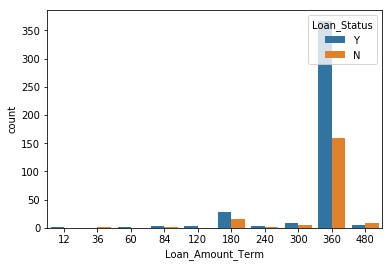

In [33]:
#EDA
loan_df.Loan_Amount_Term.value_counts()
sns.countplot(loan_df.Loan_Amount_Term,hue=loan_df.Loan_Status)
#Here we can see for loan Aount term 360 for maximum people loan_status has been Approved

In [34]:
# Exploratory Data Anlysis
loan_df.columns
#Key attributes for EDA are: Loan_status, 

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

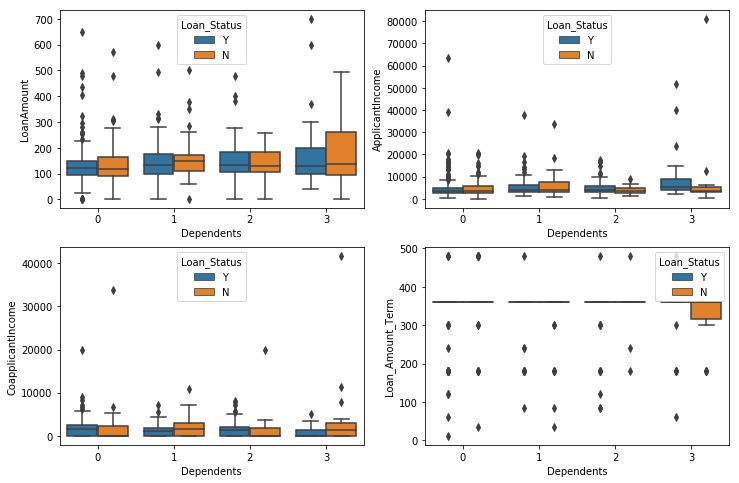

In [35]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=loan_df.Dependents, y= loan_df.LoanAmount, hue = loan_df.Loan_Status)
plt.subplot(2,2,2)
sns.boxplot(x=loan_df.Dependents, y= loan_df.ApplicantIncome, hue = loan_df.Loan_Status)
plt.subplot(2,2,3)
sns.boxplot(x=loan_df.Dependents, y= loan_df.CoapplicantIncome, hue = loan_df.Loan_Status)
plt.subplot(2,2,4)
sns.boxplot(x=loan_df.Dependents, y= loan_df.Loan_Amount_Term, hue = loan_df.Loan_Status)


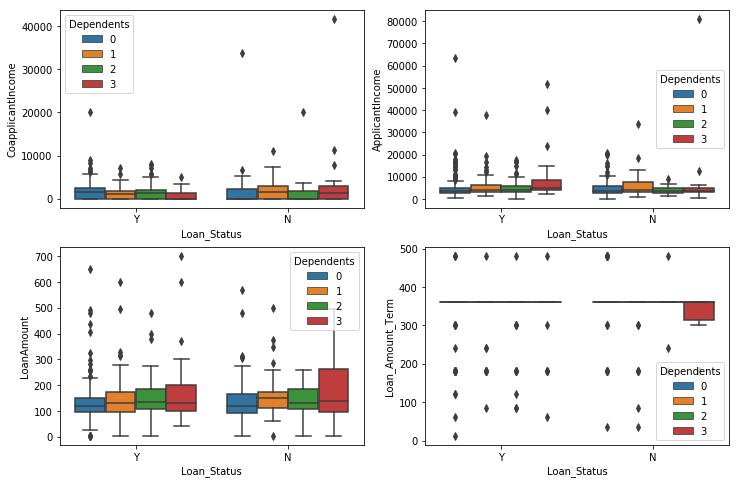

In [36]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(hue=loan_df.Dependents, y= loan_df.CoapplicantIncome, x = loan_df.Loan_Status)
plt.subplot(2,2,2)

sns.boxplot(hue=loan_df.Dependents, y= loan_df.ApplicantIncome, x = loan_df.Loan_Status)
plt.subplot(2,2,3)

sns.boxplot(hue=loan_df.Dependents, y= loan_df.LoanAmount, x = loan_df.Loan_Status)
plt.subplot(2,2,4)

sns.boxplot(hue=loan_df.Dependents, y= loan_df.Loan_Amount_Term, x = loan_df.Loan_Status)



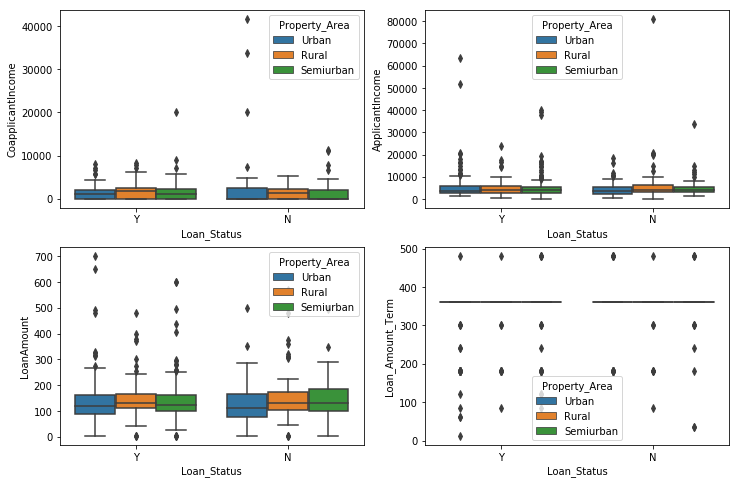

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(hue=loan_df.Property_Area, y= loan_df.CoapplicantIncome, x = loan_df.Loan_Status)
plt.subplot(2,2,2)

sns.boxplot(hue=loan_df.Property_Area, y= loan_df.ApplicantIncome, x = loan_df.Loan_Status)
plt.subplot(2,2,3)

sns.boxplot(hue=loan_df.Property_Area, y= loan_df.LoanAmount, x = loan_df.Loan_Status)
plt.subplot(2,2,4)

sns.boxplot(hue=loan_df.Property_Area, y= loan_df.Loan_Amount_Term, x = loan_df.Loan_Status)



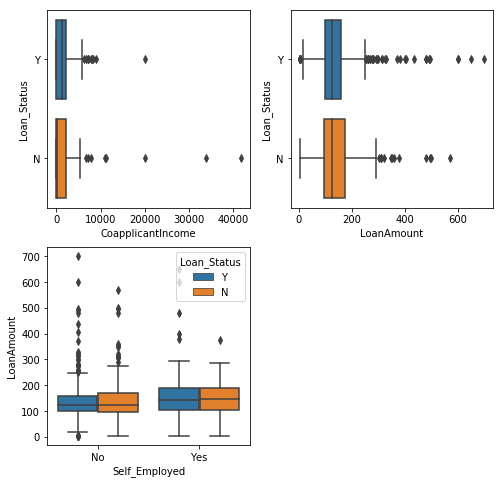

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(loan_df.CoapplicantIncome,loan_df.Loan_Status)
plt.subplot(2,2,2)
sns.boxplot(loan_df.LoanAmount,loan_df.Loan_Status)
plt.subplot(2,2,3)
sns.boxplot(loan_df.Self_Employed,loan_df.LoanAmount,hue=loan_df.Loan_Status)
plt.show()

In [39]:
#combineIncome = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
#loan_df['combineIncome'] = combineIncome


In [40]:
loan_df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,No,0,Graduate,No,5849,0,3,360,1,Urban,Y
LP001003,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [41]:
#Contigency table
pd.crosstab(loan_df['Self_Employed'],loan_df['Loan_Status'])


Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


In [42]:
pd.crosstab(loan_df['Property_Area'],loan_df['Loan_Status'])


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [43]:
loan_df.shape

(614, 11)

In [44]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 11 columns):
Married              611 non-null object
Dependents           614 non-null int64
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int64
LoanAmount           614 non-null int64
Loan_Amount_Term     614 non-null int64
Credit_History       614 non-null int64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: int64(6), object(5)
memory usage: 55.2+ KB


In [45]:
loan_df_new = loan_df.drop('Property_Area',axis=1)


In [46]:
loan_df_new.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [47]:
loan_df_new['Loan_Status'].replace(['N','Y'],[0,1],inplace=True)
loan_df_new['Self_Employed'].replace(['No','Yes'],[0,1],inplace=True)
loan_df_new['Education'].replace(['Not Graduate','Graduate'],[0,1],inplace=True)


In [48]:
loan_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 10 columns):
Married              611 non-null object
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int64
LoanAmount           614 non-null int64
Loan_Amount_Term     614 non-null int64
Credit_History       614 non-null int64
Loan_Status          614 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


In [49]:
loan_df_new =pd.get_dummies(loan_df_new,columns = ["Married"])


In [50]:
loan_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 11 columns):
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int64
LoanAmount           614 non-null int64
Loan_Amount_Term     614 non-null int64
Credit_History       614 non-null int64
Loan_Status          614 non-null int64
Married_No           614 non-null uint8
Married_Yes          614 non-null uint8
dtypes: int64(9), uint8(2)
memory usage: 58.8+ KB


In [51]:
loan_df_new.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes
Loan_ID,,,,,,,,,,,
LP001002,0,1,0,5849,0,3,360,1,1,1,0
LP001003,1,1,0,4583,1508,128,360,1,0,0,1
LP001005,0,1,1,3000,0,66,360,1,1,0,1
LP001006,0,0,0,2583,2358,120,360,1,1,0,1
LP001008,0,1,0,6000,0,141,360,1,1,1,0


# Data Preprocessing

In [52]:
X = loan_df_new.drop('Loan_Status',axis=1).values
y = loan_df_new['Loan_Status'].values

print(X.shape)
print(y.shape)

(614, 10)
(614,)


In [53]:
loan_df_new.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes
Loan_ID,,,,,,,,,,,
LP001002,0,1,0,5849,0,3,360,1,1,1,0
LP001003,1,1,0,4583,1508,128,360,1,0,0,1
LP001005,0,1,1,3000,0,66,360,1,1,0,1
LP001006,0,0,0,2583,2358,120,360,1,1,0,1
LP001008,0,1,0,6000,0,141,360,1,1,1,0


In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 10)
(429,)
(185, 10)
(185,)


In [55]:
#Reshaping

y_train = y_train.reshape(-1,1)

y_test = y_test.reshape(-1,1)

print(y_train.shape)
print(y_test.shape)

(429, 1)
(185, 1)


In [56]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

###### Logistic Regression

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y1_train_pred = logreg.predict(X_train)
train_acc1 = accuracy_score(y_train,y1_train_pred)
print("Traning Accuracy: ",train_acc1)

y1_test_pred = logreg.predict(X_test)
test_acc1 = accuracy_score(y_test,y1_test_pred)
print("Testing Accuracy: ",test_acc1)

Traning Accuracy:  0.8158508158508159
Testing Accuracy:  0.8


In [58]:
from sklearn.metrics import confusion_matrix

cf1 = confusion_matrix(y_test, y1_test_pred)
print("_"*100)

sensitivity = cf1[0,0]/(cf1[0,0]+cf1[1,0])
print("Sensitivity = ",sensitivity)

specificity = cf1[0,1]/(cf1[0,1]+cf1[1,1])
print("Specificity = ",specificity)
print()

____________________________________________________________________________________________________
Sensitivity =  0.9411764705882353
Specificity =  0.21428571428571427



###### KNN Classsifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y2_train_pred = knn.predict(X_train)
train_acc2 = accuracy_score(y_train,y2_train_pred)
print("Traning Accuracy: ",train_acc2)

y2_test_pred = knn.predict(X_test)
test_acc2 = accuracy_score(y_test,y2_test_pred)
print("Testing Accuracy: ",test_acc2)

Traning Accuracy:  0.8275058275058275
Testing Accuracy:  0.7567567567567568


### Naive Bayes classifier

#### Multinominal Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

y3a_train_pred = mnb.predict(X_train)
train_acc3a = accuracy_score(y_train,y3a_train_pred)
print("Traning Accuracy: ",train_acc3a)

y3a_test_pred = mnb.predict(X_test)
test_acc3a = accuracy_score(y_test,y3a_test_pred)
print("Testing Accuracy: ",test_acc3a)

##### Bernoulli Naive Bayed 

In [60]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

y3b_train_pred = bnb.predict(X_train)
train_acc3b = accuracy_score(y_train,y3b_train_pred)
print("Traning Accuracy: ",train_acc3b)

y3b_test_pred = bnb.predict(X_test)
test_acc3b = accuracy_score(y_test,y3b_test_pred)
print("Testing Accuracy: ",test_acc3b)

Traning Accuracy:  0.8135198135198135
Testing Accuracy:  0.8


###### Gaussian Naive Bayes Classifier


In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y3c_train_pred = gnb.predict(X_train)
train_acc3c = accuracy_score(y_train,y3c_train_pred)
print("Traning Accuracy: ",train_acc3c)

y3c_test_pred = gnb.predict(X_test)
test_acc3c = accuracy_score(y_test,y3c_test_pred)
print("Testing Accuracy: ",test_acc3c)

Traning Accuracy:  0.8111888111888111
Testing Accuracy:  0.7891891891891892


###### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion='entropy',random_state=0)
dectree.fit(X_train,y_train)

y4_train_pred = dectree.predict(X_train)
train_acc4 = accuracy_score(y_train,y4_train_pred)
print("Traning Accuracy: ",train_acc4)

y4_test_pred = dectree.predict(X_test)
test_acc4 = accuracy_score(y_test,y4_test_pred)
print("Testing Accuracy: ",test_acc4)


#As we can see the training and test accuracy, its a case of overfitting

Traning Accuracy:  1.0
Testing Accuracy:  0.7081081081081081


###### Random Foreest Classification

In [68]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
ranfor.fit(X_train,y_train)

y5_train_pred = ranfor.predict(X_train)
train_acc5 = accuracy_score(y_train,y5_train_pred)
print("Traning Accuracy: ",train_acc5)

y5_test_pred = ranfor.predict(X_test)
test_acc5 = accuracy_score(y_test,y5_test_pred)
print("Testing Accuracy: ",test_acc5)

Traning Accuracy:  0.9883449883449883
Testing Accuracy:  0.7567567567567568


###### SVM Classification

In [69]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

y6_train_pred = svm.predict(X_train)
train_acc6 = accuracy_score(y_train,y6_train_pred)
print("Traning Accuracy: ",train_acc6)

y6_test_pred = svm.predict(X_test)
test_acc6 = accuracy_score(y_test,y6_test_pred)
print("Testing Accuracy: ",test_acc6)

#Overfitting

Traning Accuracy:  0.8368298368298368
Testing Accuracy:  0.8


In [73]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN Clssifier','Bernoulli','Guassian','Decision Tree','Random Forest','SVM'],
    'TrainScore': [train_acc1,train_acc2,train_acc3b,train_acc3c,train_acc4,train_acc5,train_acc6],
    'TestScore': [test_acc1,test_acc2,test_acc3b,test_acc3c,test_acc4,test_acc5,test_acc6]})
#result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
results.head(10)

,Model,TrainScore,TestScore
0,Logistic Regression,0.815851,0.800000
1,KNN Clssifier,0.827506,0.756757
2,Bernoulli,0.813520,0.800000
3,Guassian,0.811189,0.789189
4,Decision Tree,1.000000,0.708108
5,Random Forest,0.988345,0.756757
6,SVM,0.836830,0.800000


##### Model Evaluation

# corss validation

In [74]:
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits = 5,shuffle=True, random_state=10)
accuracies = cross_val_score(logreg, X_train,y_train,scoring='accuracy',cv=folds)

print(accuracies)

[0.77906977 0.86046512 0.79069767 0.8372093  0.78823529]


In [76]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy:",accuracy_score(y_test,y1_test_pred)*100,"%")
print("_"*100)
print("Confusion Matrix\n",confusion_matrix(y_test,y1_test_pred))
print("_"*100)
print("Classification Report:\n",classification_report(y_test,y1_test_pred))


Accuracy: 80.0 %
____________________________________________________________________________________________________
Confusion Matrix
 [[ 16  36]
 [  1 132]]
____________________________________________________________________________________________________
Classification Report:
              precision    recall  f1-score   support

          0       0.94      0.31      0.46        52
          1       0.79      0.99      0.88       133

avg / total       0.83      0.80      0.76       185

